In [3]:
%pip install xarray matplotlib zarr gcsfs

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.4.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.2 MB/s eta 0:00:00
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached google_cloud_core-2.4.1-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached proto_plus-1.24.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.6/391.6 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.0/209.0 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5

In [1]:
import xarray

ds = xarray.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks=None,
    storage_options=dict(token='anon'),
)
ar_full_37_1h = ds.sel(time=slice(ds.attrs['valid_time_start'], ds.attrs['valid_time_stop']))

/Users/clairedonnelly/AI4S2S/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
da = ar_full_37_1h["sea_surface_temperature"].isel(time=slice(None, None, 6))
da = da.sel(time=slice("2010-01-01T00:00:00", None))

In [3]:
da = da.sel(latitude=slice(50, -10), longitude=slice(180, 240))

da

<xarray.DataArray 'sea_surface_temperature' (time: 21180, latitude: 241,
                                             longitude: 241)>
[1230155580 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -9.5 -9.75 -10.0
  * longitude  (longitude) float32 180.0 180.2 180.5 180.8 ... 239.5 239.8 240.0
  * time       (time) datetime64[ns] 2010-01-01 ... 2024-06-30T18:00:00
Attributes:
    long_name:   Sea surface temperature
    short_name:  sst
    units:       K

In [4]:
import lilio

# create custom calendar based on the time of interest
calendar = lilio.Calendar(anchor="08-01", allow_overlap=True)
# add target periods
calendar.add_intervals("target", length="30d")
# add precursor periods
periods_of_interest = 2
calendar.add_intervals("precursor", "1M", gap="1M", n=periods_of_interest)

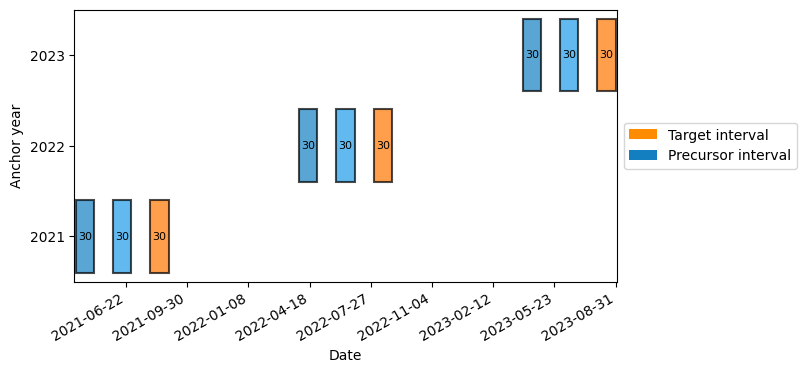

In [5]:
calendar.map_to_data(da)
calendar.visualize(show_length=True)

In [6]:
da_resample = lilio.resample(calendar, da)

da_resample

<xarray.DataArray 'sea_surface_temperature' (anchor_year: 14, i_interval: 3,
                                             latitude: 241, longitude: 241)>
array([[[[276.19434, 276.30194, 276.411  , ...,       nan,       nan,
                nan],
         [276.11145, 276.21497, 276.28574, ...,       nan,       nan,
                nan],
         [276.05264, 276.09805, 276.16904, ...,       nan,       nan,
                nan],
         ...,
         [303.27493, 303.23126, 303.19962, ..., 300.06232, 300.04434,
          300.02292],
         [303.2542 , 303.22116, 303.19467, ..., 300.01523, 299.99887,
          299.97266],
         [303.19595, 303.18985, 303.17258, ..., 299.9497 , 299.93204,
          299.90305]],

        [[279.0231 , 279.03308, 279.0385 , ...,       nan,       nan,
                nan],
         [278.9575 , 278.96863, 278.9826 , ...,       nan,       nan,
                nan],
         [278.92636, 278.94397, 278.95782, ...,       nan,       nan,
                nan],
...
         [303.08957, 303.091  , 303.0838 , ..., 300.66885, 300.64786,
          300.6439 ],
         [303.0765 , 303.07037, 303.07037, ..., 300.60782, 300.5881 ,
          300.59412],
         [303.0365 , 303.03067, 303.02695, ..., 300.5451 , 300.5548 ,
          300.5657 ]],

        [[284.7314 , 284.71967, 284.73807, ...,       nan,       nan,
                nan],
         [284.81134, 284.79337, 284.75766, ...,       nan,       nan,
                nan],
         [284.86908, 284.82748, 284.7918 , ...,       nan,       nan,
                nan],
         ...,
         [302.80716, 302.82312, 302.8336 , ..., 299.78217, 299.7737 ,
          299.74722],
         [302.77078, 302.78006, 302.79855, ..., 299.70416, 299.69745,
          299.6847 ],
         [302.7206 , 302.7287 , 302.7344 , ..., 299.61243, 299.63577,
          299.62875]]]], dtype=float32)
Coordinates:
  * anchor_year  (anchor_year) int64 2010 2011 2012 2013 ... 2020 2021 2022 2023
  * i_interval   (i_interval) int64 -2 -1 1
  * latitude     (latitude) float32 50.0 49.75 49.5 49.25 ... -9.5 -9.75 -10.0
  * longitude    (longitude) float32 180.0 180.2 180.5 ... 239.5 239.8 240.0
    left_bound   (anchor_year, i_interval) datetime64[ns] 2010-04-01 ... 2023...
    right_bound  (anchor_year, i_interval) datetime64[ns] 2010-05-01 ... 2023...
    is_target    (i_interval) bool False False True
Attributes:
    long_name:                   Sea surface temperature
    short_name:                  sst
    units:                       K
    lilio_version:               0.4.1
    lilio_calendar_anchor_date:  08-01
    lilio_calendar_code:         Calendar(\n    anchor='08-01',\n    allow_ov...
    history:                     2024-10-11 10:13:26 UTC - Resampled with a L...

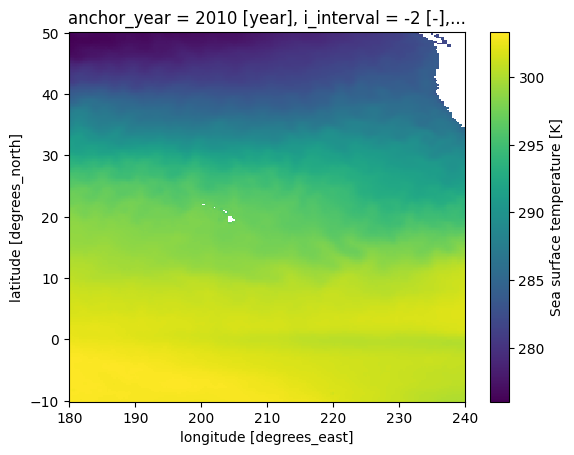

In [7]:
da_resample.isel(anchor_year=0, i_interval=0).plot()

In [23]:
da_resample.nbytes/1e9

0.009757608

In [24]:
# Add something about saving the dataset. 